# Table of Contents

# Notebook Set-Up

In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
from sklearn.preprocessing import StandardScaler

In [2]:
# Define path and import dataset
path = r'C:\Users\mmreg\OneDrive\Desktop\Data Analytics Course Work\Data Immersion\Tasks\08-2022 Exploratory Analytics Project\02 Data\Prepared'

In [3]:
df = pd.read_csv(os.path.join(path, 'citibike_clean.csv'), index_col = False)
df.head()

Unnamed: 0 trip_id  bike_id weekday  start_hour start_time  \
0           0  LnQzQk    16013     Mon          18      18:18   
1           1  IL9boN    15230     Thu          18      18:38   
2           2  46clGB    17942     Wed          19      19:44   
3           3  v7vdFt    19683     Sat          11      11:54   
4           5  HbKJBz    14581     Fri          22      22:01   

   start_station_id       start_station_name  start_station_latitude  \
0               523          W 38 St & 8 Ave               40.754666   
1               257  Lispenard St & Broadway               40.719392   
2               479          9 Ave & W 45 St               40.760193   
3               527          E 33 St & 1 Ave               40.743156   
4               293    Lafayette St & E 8 St               40.730287   

   start_station_longitude  ... end_station_id     end_station_name  \
0               -73.991382  ...            334      W 20 St & 7 Ave   
1               -74.002472  ...            236  St Marks Pl & 2 Ave   
2               -73.991255  ...            513     W 56 St & 10 Ave   
3               -73.974347  ...            441      E 52 St & 2 Ave   
4               -73.990765  ...            432    E 7 St & Avenue A   

  end_station_latitude  end_station_longitude  trip_duration  subscriber  \
0            40.742388             -73.997262            993  Subscriber   
1            40.728419             -73.987140            581  Subscriber   
2            40.768254             -73.988639            361  Subscriber   
3            40.756014             -73.967416            561  Subscriber   
4            40.726218             -73.983799            427  Subscriber   

  birth_year  age  gender  customer_volume  
0       1968   45       2      High Volume  
1       1983   30       1      High Volume  
2       1989   24       1      High Volume  
3       1988   25       2    Normal Volume  
4       1986   27       2       Low Volume  

[5 rows x 21 columns]

In [4]:
df = df.drop(columns = 'Unnamed: 0')
# Ensure removal of column
df.head()

trip_id  bike_id weekday  start_hour start_time  start_station_id  \
0  LnQzQk    16013     Mon          18      18:18               523   
1  IL9boN    15230     Thu          18      18:38               257   
2  46clGB    17942     Wed          19      19:44               479   
3  v7vdFt    19683     Sat          11      11:54               527   
4  HbKJBz    14581     Fri          22      22:01               293   

        start_station_name  start_station_latitude  start_station_longitude  \
0          W 38 St & 8 Ave               40.754666               -73.991382   
1  Lispenard St & Broadway               40.719392               -74.002472   
2          9 Ave & W 45 St               40.760193               -73.991255   
3          E 33 St & 1 Ave               40.743156               -73.974347   
4    Lafayette St & E 8 St               40.730287               -73.990765   

  end_time  end_station_id     end_station_name  end_station_latitude  \
0    18:35             334      W 20 St & 7 Ave             40.742388   
1    18:48             236  St Marks Pl & 2 Ave             40.728419   
2    19:50             513     W 56 St & 10 Ave             40.768254   
3    12:03             441      E 52 St & 2 Ave             40.756014   
4    22:08             432    E 7 St & Avenue A             40.726218   

   end_station_longitude  trip_duration  subscriber  birth_year  age  gender  \
0             -73.997262            993  Subscriber        1968   45       2   
1             -73.987140            581  Subscriber        1983   30       1   
2             -73.988639            361  Subscriber        1989   24       1   
3             -73.967416            561  Subscriber        1988   25       2   
4             -73.983799            427  Subscriber        1986   27       2   

  customer_volume  
0     High Volume  
1     High Volume  
2     High Volume  
3   Normal Volume  
4      Low Volume

In [5]:
# Define figure size throughout notebook
sns.set(rc = {'figure.figsize':(20,12)})

# Question 2
## Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).

### - Data has been cleaned in previous tasks

### - Columns have concise names for efficiency and clarity

In [6]:
# Remove all columns with categorical variables
df_2 = df[['start_hour', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'trip_duration', 'age']]
df_2.head()

start_hour  start_station_latitude  start_station_longitude  \
0          18               40.754666               -73.991382   
1          18               40.719392               -74.002472   
2          19               40.760193               -73.991255   
3          11               40.743156               -73.974347   
4          22               40.730287               -73.990765   

   end_station_latitude  end_station_longitude  trip_duration  age  
0             40.742388             -73.997262            993   45  
1             40.728419             -73.987140            581   30  
2             40.768254             -73.988639            361   24  
3             40.756014             -73.967416            561   25  
4             40.726218             -73.983799            427   27

# Question 3
## Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [19]:
# Define range of potential cluster numbers and k-mean clusters
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters = i) for i in num_cl]

In [20]:
# Find the scores of all clusters
score = [kmeans[i].fit(df_2).score(df_2) for i in range(len(kmeans))]

In [21]:
score

[-11746124498.537045,
 -3823394855.411201,
 -1864340750.8398387,
 -1089127020.9456606,
 -707430420.9357989,
 -491269545.53427416,
 -361598096.26283383,
 -279149234.75992537,
 -221419049.98080364]

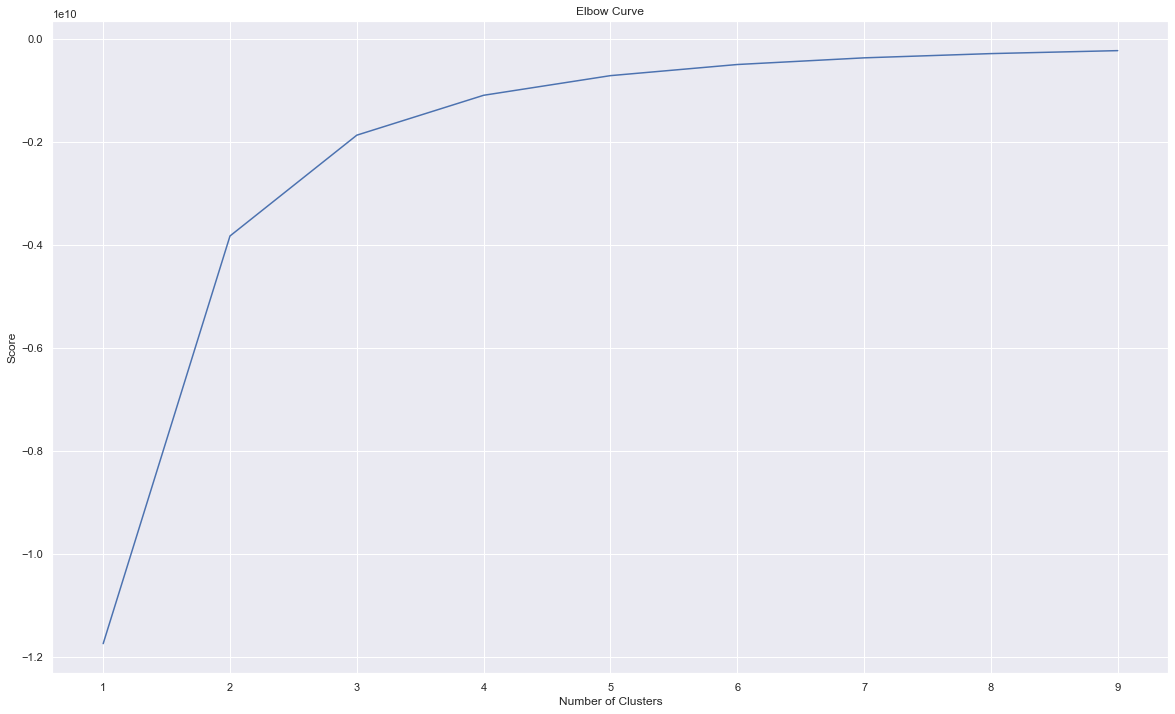

In [22]:
# Plot the elbow curve
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# Question 4
## Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.
### For this analysis, and going off of the elbow curve created here, I have decided that the optimal clusters will be three. While the curve does not have a solid and defined bend in it, the last number of clusters with a discernable bend is 3. This leads me to believe that this is the optimal cluster count for this analysis.

# Question 5
## Run the k-means algorithm.

In [23]:
# Create the k-means object
kmeans = KMeans(n_clusters = 3)
# I tried using n_jobs, but received a "TypeError: __init__() got an unexpected keyword argument 'n_jobs'. I omitted as per StackOverflow suggestion.

In [25]:
# Fit k-means object to the dataset
kmeans.fit(df_2)

KMeans(n_clusters=3)

# Question 6
## Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [26]:
# Create and attach column to dataset
df_2['clusters'] = kmeans.fit_predict(df_2)

C:\Users\mmreg\AppData\Local\Temp\ipykernel_21236\3436288084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['clusters'] = kmeans.fit_predict(df_2)


In [28]:
df_2.head()

start_hour  start_station_latitude  start_station_longitude  \
0          18               40.754666               -73.991382   
1          18               40.719392               -74.002472   
2          19               40.760193               -73.991255   
3          11               40.743156               -73.974347   
4          22               40.730287               -73.990765   

   end_station_latitude  end_station_longitude  trip_duration  age  clusters  
0             40.742388             -73.997262            993   45         1  
1             40.728419             -73.987140            581   30         0  
2             40.768254             -73.988639            361   24         0  
3             40.756014             -73.967416            561   25         0  
4             40.726218             -73.983799            427   27         0

In [29]:
df_2['clusters'].value_counts()

0    25779
1    12960
2     4117
Name: clusters, dtype: int64

# Question 7
## Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

Fig. 1


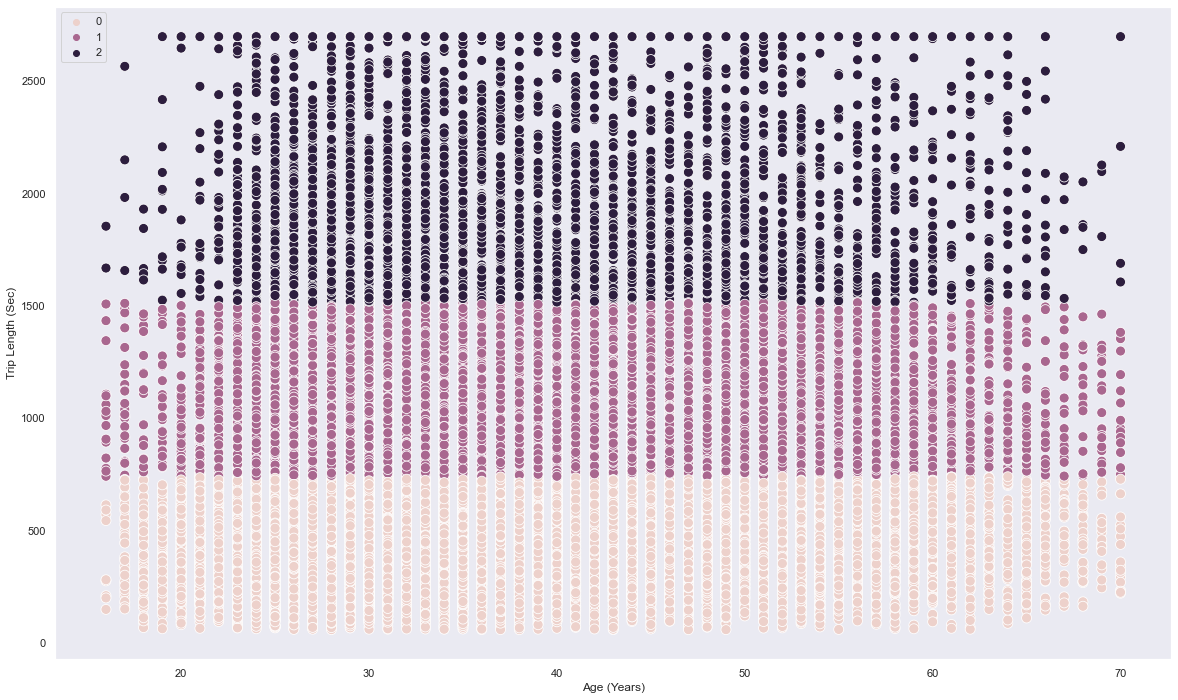

In [40]:
# Plot age and trip_duration with cluster information
print('Fig. 1')
plt.figure(figsize=(20, 12))
ax = sns.scatterplot(x=df_2['age'], y=df['trip_duration'], hue = kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Age (Years)')
plt.ylabel('Trip Length (Sec)')
plt.show()

Fig. 2


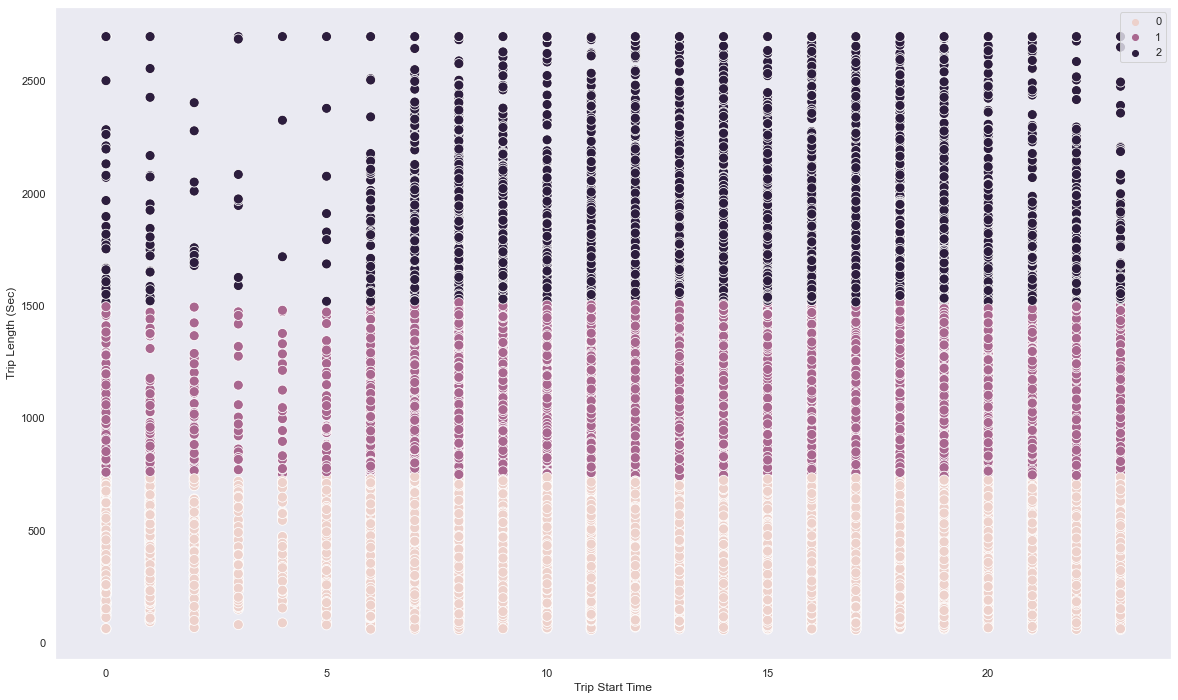

In [39]:
# Plot trip_duration and start_hour with cluster information
print('Fig. 2')
plt.figure(figsize=(20, 12))
ax = sns.scatterplot(x=df_2['start_hour'], y=df['trip_duration'], hue = kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Trip Start Time')
plt.ylabel('Trip Length (Sec)')
plt.show()

Fig. 3


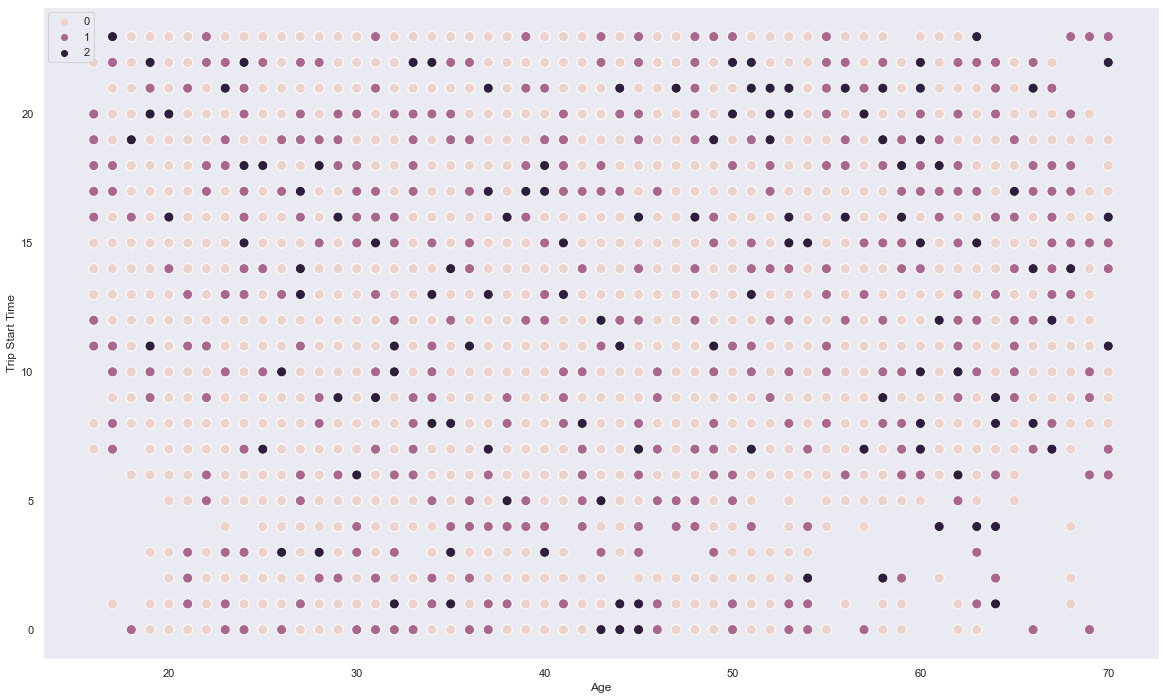

In [41]:
# Plot age and start_hour with cluster information
print('Fig. 3')
plt.figure(figsize=(20, 12))
ax = sns.scatterplot(x=df_2['age'], y=df['start_hour'], hue = kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Age')
plt.ylabel('Trip Start Time')
plt.show()

# Question 8
## Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.

### From what I can gather from the clusters, the clusters represent the trip lengths within the data and break it down into short, medium, and long length trips (as seen in Fig. 1). Black would be the long trips, purple the medium trips, and pink the short trips. From this we can deduce that those riders who are of the college or young working professional age are more likely to take longer trips, while younger customers and senior citizens are more likely to use it on shorter trips. Using cluster insight and applying it to Fig. 2, we can see that the longest trips occur during peak hours while the early hours of the morning see much shorter trips on average. Fig. 3 has very little in the way of insight with the cluster information, though upon glancing at the visual I can make an educated hypothesis that youth are more likely to take short trips than senior citizens.

# Question 9
## Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [44]:
# Create groupings by cluster for clarity
df_2.loc[df_2['clusters'] == 2, 'cluster'] = 'Long Trip'
df_2.loc[df_2['clusters'] == 1, 'cluster'] = 'Medium Trip'
df_2.loc[df_2['clusters'] == 0, 'cluster'] = 'Short Trip'

C:\Users\mmreg\AppData\Local\Temp\ipykernel_21236\1222509068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[df_2['clusters'] == 2, 'cluster'] = 'Long Trip'


In [46]:
df_2.groupby('cluster').agg({'age':['mean', 'median'], 'trip_duration':['mean', 'median'], 'start_hour':['mean', 'median'], 'start_station_latitude':['mean', 'median'], 'start_station_longitude':['mean', 'median']})

age        trip_duration         start_hour         \
                  mean median          mean  median       mean median   
cluster                                                                 
Long Trip    38.292203   36.0   1985.240952  1880.0  14.594122   16.0   
Medium Trip  37.437191   35.0   1043.730478  1004.0  14.270833   15.0   
Short Trip   36.918344   35.0    438.630940   437.0  13.909578   15.0   

            start_station_latitude            start_station_longitude  \
                              mean     median                    mean   
cluster                                                                 
Long Trip                40.732628  40.734161              -73.991124   
Medium Trip              40.734574  40.736245              -73.991003   
Short Trip               40.734725  40.736494              -73.990885   

                        
                median  
cluster                 
Long Trip   -73.990931  
Medium Trip -73.990931  
Short Trip  -73.990765

# Question 10
## Propose what these results could be useful for in future steps of an analytics pipeline.

### Unfortunately, according to the descriptive statistics the assumptions made at the visualization stage were mostly incorrect. The average and median age for all three clusters are very similar, the start hour (though it does show slight correlation with shorter trips starting earlier in the day) is almost too weak to call a relationship. Further insight and analysis would be needed to make sure there is no relationship between these variables. There is some good that comes of this, however. Starting longitude and latitude could give us insight on the most popular stations, and with that we could determine any relationships with further analysis to potentially find ideal bike dispursement. and the mean/median of the trip durations gives us a defined parameter for what a short, medium, and long trip means in terms of trip length. Further insight and analysis would be needed 